In [1]:
import numpy as np
import matplotlib
#matplotlib.use('nbagg')

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import os
from itertools import product

from mcba.models.impurity import Par, SingleImpurity
from mcba.walker import Walker
from mcba.helpers import copydict
from mcba.walker_factory import WalkerFactory

import postproc as pp

In [ ]:
##### Run MC ----- FIXME: doesn't quite work from the notebook

In [37]:
mc_dict = {"num_sweeps"      : np.Inf,
          "steps_per_sweep" : 100,
          "therm_sweeps"    : 0,
          "checkp_sweeps"   : 100,
          "printout_sweeps" : 100,
          "seed"            : 42,
          "verbose_logg"    : True,
          "threshold"       : 0.995, 
          "store_roots"     : False,
        }

base_path = "../data/g3"

V=1.5
N = 135
mqs =  [8] #[8, 9, 11, 12, 14, 15 ] #[0, 1, 2, 3, 4, 5]

tasks = []
for mq in mqs:
    par = Par(N=N, L=3*N, V=V, m_q = mq)
    db_fname = os.path.join(base_path, "N{0}V0.5mq{1}.sqlite".format(par.N, par.m_q))
    dct = {"model": SingleImpurity(par), 
           "db_fname": db_fname}
    tasks.append( copydict(mc_dict, dct))

factory = WalkerFactory(tasks, 6, freq=1, verbose=True)
factory.start()



@ 2015-05-13 18:58:32.133406: starting  ../data/g3/N135V0.5mq8.sqlite
	w/ threshold = 0.995
running: 


KeyboardInterrupt: 

Cubic fit:
N =  45 dp_inf / dp_0 = 0.95398 2nd deriv = 0.089887
[ -3.70088193e-01   8.98867759e-02   9.53981365e-01   3.44122077e-04]
Quadratic fit:
*N=  45 dp_inf / dp_0 =  0.964 2nd deriv = -0.033476
[ -3.34759550e-02   9.63996591e-01   2.46650290e-04]
Cubic fit:
N =  135 dp_inf / dp_0 = 0.95738 2nd deriv = 0.015544
[ -1.08654226e-01   1.55437838e-02   9.57383541e-01   2.89179431e-04]
Quadratic fit:
*N=  135 dp_inf / dp_0 = 0.96049 2nd deriv = -0.020846
[ -2.08458236e-02   9.60494280e-01   2.42901189e-04]


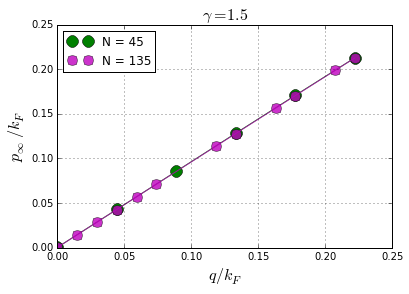

In [11]:
### Plot \gamma = 3 data
base_path = "../data/meff"
filez = [f for f in pp.list_dbs(base_path, lambda x: x.endswith('sqlite'))]

data = pp.filter_pred(filez, lambda par, arr: True)

data = data[data['gamma']==1.5]

ax = fit_mef(data)
plt.show()


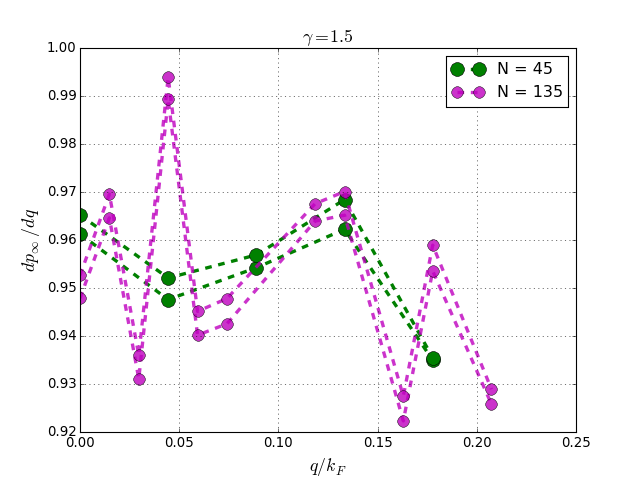

In [78]:
fig, ax = plt.subplots()
mparam = {45: {'alpha': 1, 'color':'g', 'ms':12},
          135: {'alpha': 0.8, 'color':'m', 'ms':10}}

for N in np.unique(data['N']):
    d = data[data['N'] == N]
    d = np.sort(d, order='q')

    deriv = np.diff(d['P1']) / np.diff(d['q'])
    ax.plot(d['q'][:-1], deriv, 'o--',
            lw=3, **mparam[N])
    
    deriv = np.diff(d['P2']) / np.diff(d['q'])
    ax.plot(d['q'][:-1], deriv, 'o--',
            lw=3, label='N = %s' % N, **mparam[N])
    
ax.set_title(r'$\gamma = %s$' % data['gamma'][0], fontsize=16)
ax.set_xlabel(r'$q / k_F$', fontsize=16)
ax.set_ylabel(r'$d p_\infty / dq$', fontsize=16)
ax.grid(True)
ax.legend(loc='upper right')
plt.show()

##### Use a larger $\gamma$

Cubic fit:
N =  45 dp_inf / dp_0 = 0.55363 2nd deriv = -0.13239
[  1.61642614e-01  -1.32386795e-01   5.53629698e-01   6.70193639e-05]
Quadratic fit:
*N=  45 dp_inf / dp_0 = 0.54926 2nd deriv = -0.078506
[ -7.85059239e-02   5.49255369e-01   1.09591904e-04]
Cubic fit:
N =  135 dp_inf / dp_0 = 0.5889 2nd deriv = -0.24951
[  5.29019272e-01  -2.49512750e-01   5.88896644e-01   1.87428058e-04]
Quadratic fit:
*N=  135 dp_inf / dp_0 = 0.58026 2nd deriv = -0.11198
[ -1.11977009e-01   5.80256415e-01   2.78787665e-04]


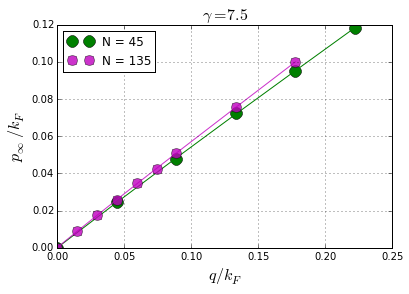

In [13]:
base_path = "../data/meff"
filez = [f for f in pp.list_dbs(base_path, lambda x: x.endswith('sqlite'))]

data = pp.filter_pred(filez, lambda par, arr: True)

data = data[data['gamma'] == 7.5]

ax = fit_mef(data)
plt.show()

Cubic fit:
N =  45 dp_inf / dp_0 = 0.8444 2nd deriv = 0.12979
[ -5.58304491e-01   1.29787328e-01   8.44396615e-01   4.08076211e-04]
Quadratic fit:
*N=  45 dp_inf / dp_0 = 0.87936 2nd deriv = -0.13075
[ -1.30754768e-01   8.79356126e-01  -8.27086317e-04]


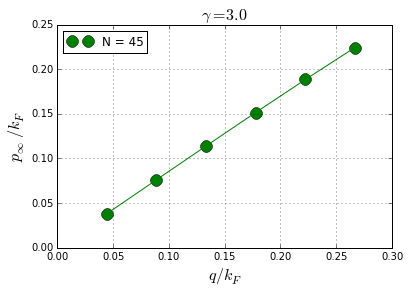

In [12]:
base_path = "../data/g6parts"
filez = [f for f in pp.list_dbs(base_path, lambda x: x.endswith('sqlite'))]

data = pp.filter_pred(filez, lambda par, arr: True)

data = data[data['q'] < 0.3]

ax = fit_mef(data)
plt.show()

In [3]:
def fit_mef(data, ax=None):

    if ax is None:
        fig, ax = plt.subplots()
    
    mparam = {45: {'alpha': 1, 'color':'g', 'ms':12},
              135: {'alpha': 0.8, 'color':'m', 'ms':10}}

    for N in np.unique(data['N']):
        d = data[data['N'] == N]
        d = np.sort(d, order='q')

        ax.plot(d['q'], d['P2'], 'o',
                lw=3, label='N = %s' % N, **mparam[N])

        # polynomial fit
        print "Cubic fit:" 
        coef = np.polyfit(d['q'], d['P2'], 3)
        poly = np.poly1d(coef)
        ax.plot(d['q'], poly(d['q']), **mparam[N])
        print "N = ", N, 'dp_inf / dp_0 = %6.5g' % coef[-2], "2nd deriv = %6.5g" % coef[-3]
        print coef

        # polynomial fit
        print "Quadratic fit:"     
        coef = np.polyfit(d['q'], d['P2'], 2)
        poly = np.poly1d(coef)
        #ax.plot(d['q'], poly(d['q']), **mparam[N])
        print "*N= ", N, 'dp_inf / dp_0 = %6.5g' % coef[-2], "2nd deriv = %6.5g" % coef[-3]
        print coef


    ax.set_title(r'$\gamma = %s$' % data['gamma'][0], fontsize=16)
    ax.set_xlabel(r'$q / k_F$', fontsize=16)
    ax.set_ylabel(r'$p_\infty / k_F$', fontsize=16)
    ax.grid(True)
    ax.legend(loc='upper left')
    
    return ax

In [ ]:
#### The slope of P_inf(P_0) vs \gamma #####

In [130]:
base_path = "../data/meff"
filez = [f for f in pp.list_dbs(base_path, lambda x: x.endswith('sqlite'))]

data_all = pp.filter_pred(filez, lambda par, arr: True)

In [131]:
####### add g6parts @ N=45
base_path = "../data/g6parts"
filez = [f for f in pp.list_dbs(base_path, lambda x: x.endswith('sqlite'))]
data = pp.filter_pred(filez, lambda par, arr: True)
data = data[data['q'] < 0.3]

data_all = np.concatenate((data, data_all))
del data

In [132]:
data_all['gamma']

array([ 3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  7.5,  1.5,  4.5,  1.5,  6. ,
        4.5,  7.5,  7.5,  1.5,  7.5,  7.5,  4.5,  1.5,  6. ,  1.5,  1.5,
        1.5,  4.5,  6. ,  6. ,  7.5,  1.5,  7.5,  1.5,  1.5,  7.5,  4.5,
        7.5,  7.5,  1.5,  1.5,  7.5,  7.5,  6. ,  6. ,  1.5,  7.5,  4.5,
        7.5,  1.5,  7.5,  1.5,  1.5,  1.5,  1.5])

In [92]:
def fit_slope(x, y):
    """Fit a parabola, return linear coef + err."""
    coef, cov = np.polyfit(x, y, 1, cov=True)
    return coef[0], np.sqrt(np.diag(cov))[0]

In [133]:
### start w/ 'data_all'
dt = np.dtype([('N', int),('gamma', float),
               ('dP1', float), ('err_dP1', float),
               ('dP2', float), ('err_dP2', float)])
res, this = np.empty(1, dtype=dt), np.empty(1, dtype=dt)

d45 = data_all[data_all['N'] == 45]
for gam in np.unique(d45['gamma']):
    this['gamma'] = gam
    
    dd = d45[d45['gamma'] == gam]
    dd = np.sort(dd, order='q')

    coef, err = fit_slope(dd['q'], dd['P1'])
    this['dP1'], this['err_dP1'] = coef, err
    coef, err = fit_slope(dd['q'], dd['P2'])
    this['dP2'], this['err_dP2'] = coef, err

    res = np.vstack((res, this))
    
res['N'] = 45
res = res[1:]

In [134]:
res

array([[ (45, 1.5, 0.9527882824618557, 0.0023763804600272177, 0.9565574899010786, 0.00273905171173231)],
       [ (45, 3.0, 0.8338691961348171, 0.006267560019491578, 0.8386768647949986, 0.006242328307323042)],
       [ (45, 4.5, 0.7110512667358236, 0.006517550000223433, 0.7210000720175408, 0.00644872238513143)],
       [ (45, 6.0, 0.5972056892264412, 0.008591165037625895, 0.6564058087879364, 0.008420036566836346)],
       [ (45, 7.5, 0.4947977623257603, 0.0062316331391848185, 0.5318096083033841, 0.004203439350236035)]], 
      dtype=[('N', '<i8'), ('gamma', '<f8'), ('dP1', '<f8'), ('err_dP1', '<f8'), ('dP2', '<f8'), ('err_dP2', '<f8')])

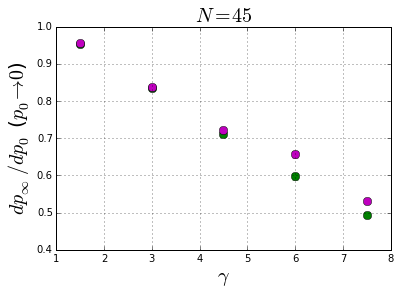

In [135]:
fig, ax = plt.subplots()

err_param = {'ms': 8, 'elinewidth': 4}

ax.errorbar(res['gamma'], res['dP1'], res['err_dP1'], fmt='go', **err_param)
ax.errorbar(res['gamma'], res['dP2'], res['err_dP2'], fmt='mo', **err_param)

ax.set_title(r'$N = 45$', fontsize=20)
ax.set_xlabel(r'$\gamma$', fontsize=20)
ax.set_ylabel(r'$dp_\infty / dp_0$ ($p_0\to 0$)', fontsize=20)
ax.grid(True)